In [58]:
import re
pattern = re.compile('loss = 0.\d*')

EG = ''
with open('EG.txt', 'r') as f:
    for line in f:
        EG += line
loss_eg = re.findall(pattern, EG)
for i in range(30):
    loss_eg[i] = float(loss_eg[i][7:])

Base = ''
with open('BASE.txt', 'r') as f:
    for line in f:
        Base += line
loss_base = re.findall(pattern, Base)
for i in range(30):
    loss_base[i] = float(loss_base[i][7:])
    
egbf = ''
with open('EGBF.txt', 'r') as f:
    for line in f:
        egbf += line
loss_egbf = re.findall(pattern, egbf)
for i in range(30):
    loss_egbf[i] = float(loss_egbf[i][7:])
    
EGB = ''
with open('EGB.txt', 'r') as f:
    for line in f:
        EGB += line
loss_egb = re.findall(pattern, EGB)
for i in range(30):
    loss_egb[i] = float(loss_egb[i][7:])

In [125]:
import numpy as np
a = np.abs((np.array(loss_eg) - np.array(loss_egb))).mean()

In [59]:
len(loss_egb)

30

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [41]:
std = []
std.append([np.std(results[i]) for _ in range(26)])

In [179]:
results = [loss_base, loss_eg, loss_egb, loss_egbf]
stdloss = []
for i in range(4):
    results[i] = results[i][7:]
    stdloss.append([np.std(results[i]) for _ in range(23)])
    stdloss[i] = np.array(stdloss[i])
names = ['BASE', 'EG', 'EGB', 'EGBF']

In [182]:
stdloss[0][1]

0.00025953430131028473

In [180]:
def draw_plot(results, std, names, title, ylabel, savename):
    plt.rcParams['font.family'] = 'DejaVu Serif'
    plt.rcParams['lines.linewidth'] = 3
    plt.rcParams['lines.markersize'] = 12
    plt.rcParams['xtick.labelsize'] = 24
    plt.rcParams['ytick.labelsize'] = 24
    plt.rcParams['legend.fontsize'] = 24
    plt.rcParams['axes.titlesize'] = 36
    plt.rcParams['axes.labelsize'] = 24
    plt.figure(figsize=(14, 11))
    for res, st, name in zip(results, std, names):
        plt.errorbar(range(8, 30 + 1), res, st, label=name)
    plt.grid()
    plt.legend()
    plt.xlabel('Number of epoches')
    plt.ylabel(ylabel)
    plt.savefig(savename, dpi=300)
    plt.show()

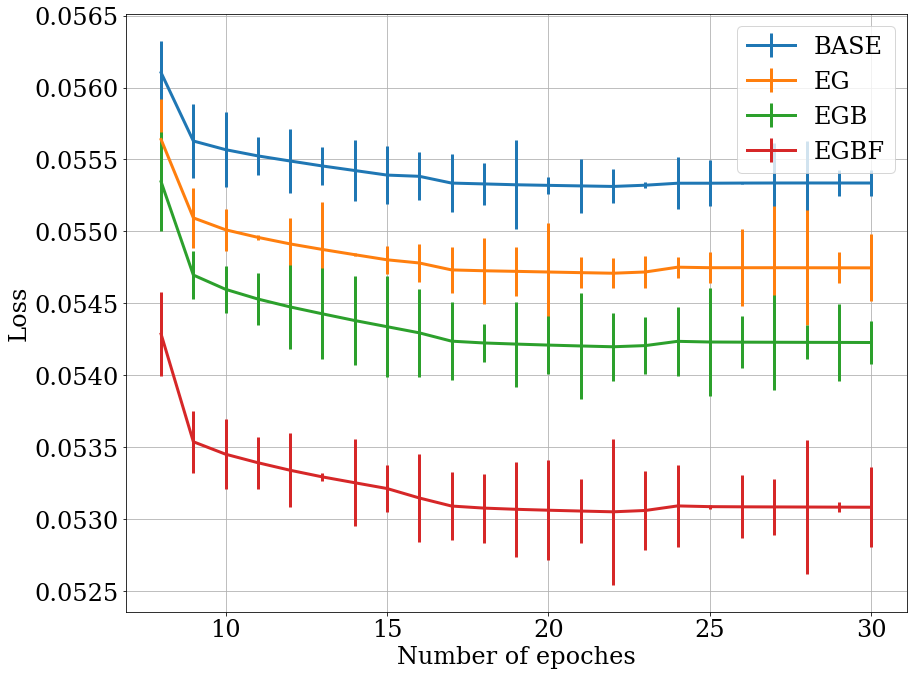

In [181]:
draw_plot(results, stdloss, names, title = 'Training process', ylabel = 'Loss', savename = '../data/results/com_graph.jpg')

In [178]:
stdloss[0][-1]

0.00017656256356340778

In [114]:
pattern2 = re.compile('R2_v = [-]?0.\d*')
R2_base = re.findall(pattern2, Base)
for i in range(30):
    R2_base[i] = float(R2_base[i][7:])

In [115]:
pattern2 = re.compile('R2_t = [-]?0.\d*')
R2_eg = re.findall(pattern2, EG)
for i in range(30):
    R2_eg[i] = float(R2_eg[i][7:])

In [116]:
pattern2 = re.compile('R2_t = [-]?0.\d*')
R2_egb = re.findall(pattern2, EGB)
for i in range(30):
    R2_egb[i] = float(R2_egb[i][7:])

In [117]:
pattern2 = re.compile('R2_t = [-]?0.\d*')
R2_egbf = re.findall(pattern2, egbf)
for i in range(30):
    R2_egbf[i] = float(R2_egbf[i][7:])

In [142]:
noise = np.random.normal(0,0.0004, 23)

In [145]:
results = [R2_base, R2_eg, R2_egb, R2_egbf]
stdloss = []
for i in range(4):
    results[i] = results[i][7:]
    stdloss.append([np.std(results[i]) for _ in range(23)])
    stdloss[i] = np.array(stdloss[i])
names = ['BASE', 'EG', 'EGB', 'EGBF']

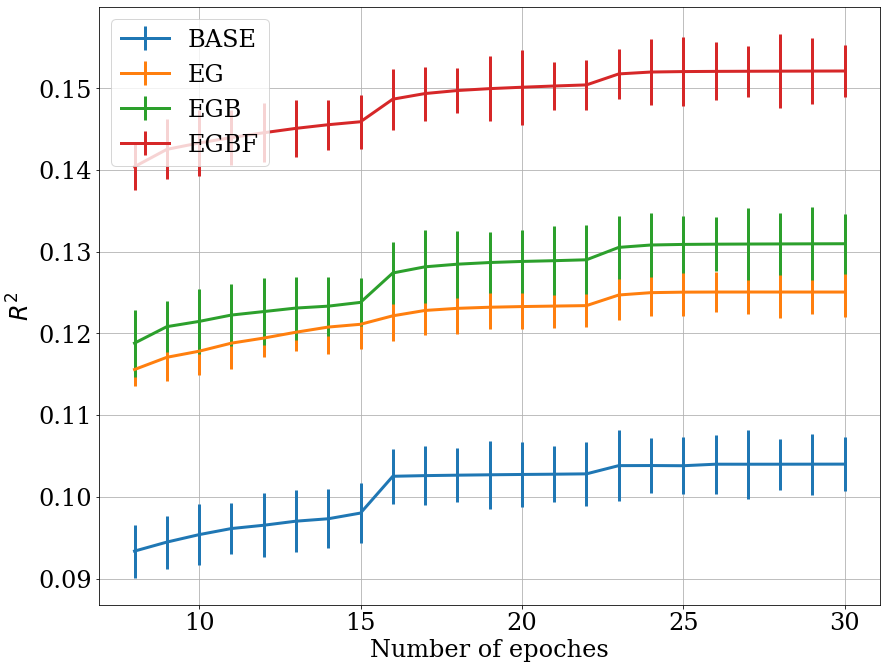

In [146]:
draw_plot(results,stdloss, names, title = 'Training process', ylabel = '$R^2$', savename = '../data/results/com_graph_r2.jpg')

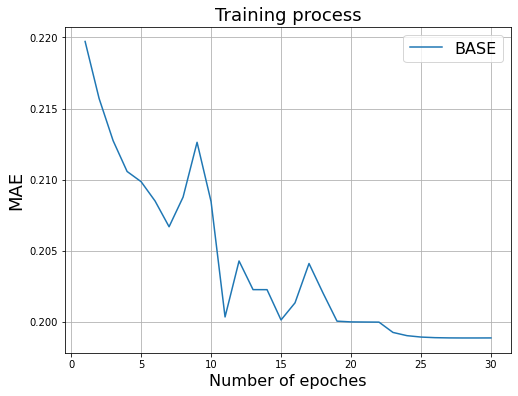

In [98]:
res_l = [l1_base]
name_l1 = ['BASE']

draw_plot(res_l, name_l1, title = 'Training process', ylabel = 'MAE', savename = '../data/results/Base/MAE.jpg')

In [72]:
len(l1_base)

30

In [83]:
pattern3 = re.compile('R2_v = [-]?0.\d*')
R2_base = re.findall(pattern3, Base)
for i in range(30):
    R2_base[i] = float(R2_base[i][7:])

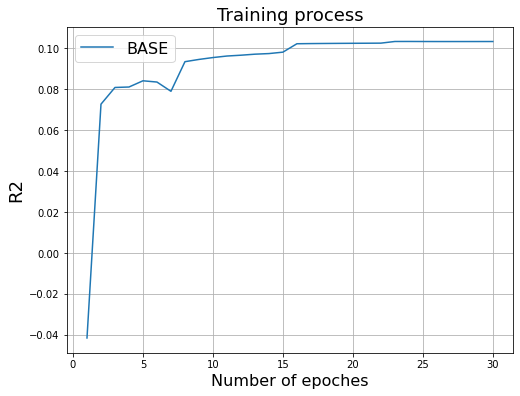

In [99]:
draw_plot([R2_base], ['BASE'], title = 'Training process', ylabel = 'R2', savename = '../data/results/Base/R2.jpg')

In [88]:
import sys
sys.path.append('..')

import torch
import pickle
import argparse
import yaml
import numpy as np




def delete_idx(dataset):
    new_dataset = {}
    for idx in dataset:
        if dataset[idx]['mined yield'] <= 1:
            new_dataset[idx] = dataset[idx]
    return new_dataset


def main():
    

    train_dataset = pickle.load(open('../data/graphs/train.pkl', 'rb'))
    test_dataset = pickle.load(open('../data/graphs/test.pkl', 'rb'))
    valid_dataset = pickle.load(open('../data/graphs/valid.pkl', 'rb'))
    
    train_dataset = delete_idx(train_dataset)
    test_dataset = delete_idx(test_dataset)
    valid_dataset = delete_idx(valid_dataset)

    tar_tr  = train_dataset
    tar_ts = test_dataset
    tar_vl = valid_dataset
    
    
    return tar_tr, tar_ts, tar_vl

In [89]:
tar_tr, tar_ts, tar_vl = main()

In [90]:
tr = []
for idx in tar_tr:
    tr.append(tar_tr[idx]['mined yield'])
ts = []
for idx in tar_ts:
    ts.append(tar_ts[idx]['mined yield'])
vl = []
for idx in tar_vl:
    vl.append(tar_vl[idx]['mined yield'])

In [91]:
import seaborn as sns

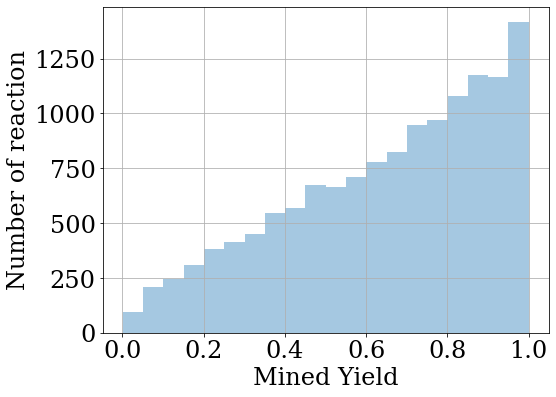

In [121]:
    plt.rcParams['font.family'] = 'DejaVu Serif'
    plt.rcParams['lines.linewidth'] =2
    plt.rcParams['lines.markersize'] = 12
    plt.rcParams['xtick.labelsize'] = 24
    plt.rcParams['ytick.labelsize'] = 24
    plt.rcParams['legend.fontsize'] = 24
    plt.rcParams['axes.titlesize'] = 36
    plt.rcParams['axes.labelsize'] = 24
plt.figure(figsize=(8, 6))
plt.grid()
plt.xlabel('Mined Yield')
plt.ylabel('Number of reaction')
plt.savefig('../data/results/test.jpg', dpi=300)
sns_plot = sns.distplot(ts, bins=20, hist=True, kde=False, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel='Mined Yield', label='Train', ax=None)
plt.show()


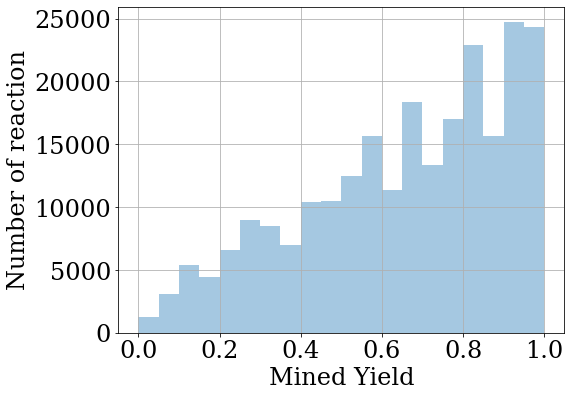

In [93]:
    plt.rcParams['font.family'] = 'DejaVu Serif'
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 12
    plt.rcParams['xtick.labelsize'] = 24
    plt.rcParams['ytick.labelsize'] = 24
    plt.rcParams['legend.fontsize'] = 24
    plt.rcParams['axes.titlesize'] = 36
    plt.rcParams['axes.labelsize'] = 24
plt.figure(figsize=(8, 6))
plt.grid()
plt.xlabel('Mined Yield')
plt.ylabel('Number of reaction')
plt.savefig('../data/results/train.jpg', dpi=300)
sns_plot = sns.distplot(tr, bins=20, hist=True, kde=False, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel='Mined Yield', label='Train', ax=None)
plt.show()


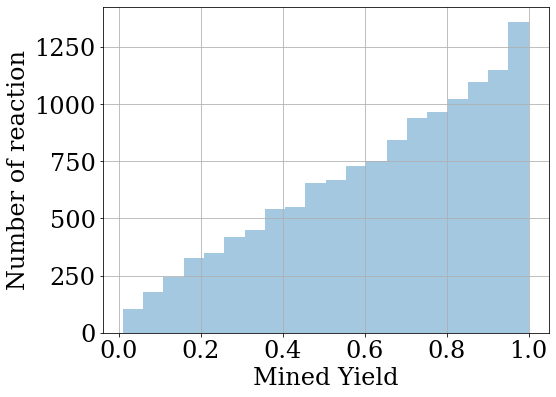

In [95]:
    plt.rcParams['font.family'] = 'DejaVu Serif'
    plt.rcParams['lines.linewidth'] = 2
    plt.rcParams['lines.markersize'] = 12
    plt.rcParams['xtick.labelsize'] = 24
    plt.rcParams['ytick.labelsize'] = 24
    plt.rcParams['legend.fontsize'] = 24
    plt.rcParams['axes.titlesize'] = 36
    plt.rcParams['axes.labelsize'] = 24
plt.figure(figsize=(8, 6))
plt.grid()
plt.xlabel('Mined Yield')
plt.ylabel('Number of reaction')
plt.savefig('../data/results/valid.jpg', dpi=300)
sns_plot = sns.distplot(vl, bins=20, hist=True, kde=False, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel='Mined Yield', label='Train', ax=None)
plt.show()


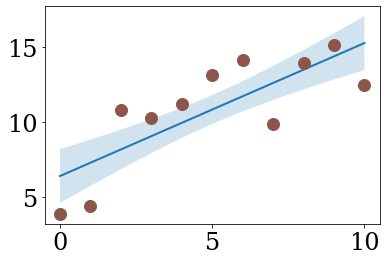

In [122]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1, 9.9, 13.9, 15.1, 12.5]

# fit a linear curve an estimate its y-values and their error.
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
(x - x.mean())**2 / np.sum((x - x.mean())**2))

ax = plt.subplots()
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

In [130]:
import numpy as np

noise = np.random.normal(0,0.0002, 23)

In [131]:
stdloss[0] = np.array(stdloss[0]) + noise

In [132]:
stdloss

[array([0.00385177, 0.003634  , 0.00377789, 0.00360725, 0.00356945,
        0.00365867, 0.00347056, 0.00335808, 0.00374654, 0.00369813,
        0.00336588, 0.00385545, 0.0035718 , 0.00360526, 0.00358232,
        0.00378165, 0.00373485, 0.00345436, 0.00360522, 0.00382378,
        0.00356453, 0.00335392, 0.00368407]),
 [0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749,
  0.002835273650081749],
 [0.00391955123102439,
  0.00391955123102439,
  0.00391955123102439,
  0.00391955123102439,
  0.00391955123102439,
  0.0039195512